**Brian Blaylock**  
**May 29, 2019**

# _Not Shown_: HRRR Storm Relative Helicity
- `HLCY:3000-0 m`
- `HLCY:1000-0 m`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
#from BB_GOES.get_GOES import get_GOES_nearesttime
#from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_cmap.reflectivity_cmap import reflect_ncdc

#from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

from fires_list import get_fire

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [7.8, 7.2]
mpl.rcParams['figure.titlesize'] = 10
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['grid.linewidth'] = .25
#mpl.rcParams['figure.subplot.wspace'] = 0.01
#mpl.rcParams['figure.subplot.hspace'] = 0.01
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 600

In [2]:
lat, lon = get_hrrr_latlon(DICT=False)

finished Mallard
finished Lake Christine
finished July Storm


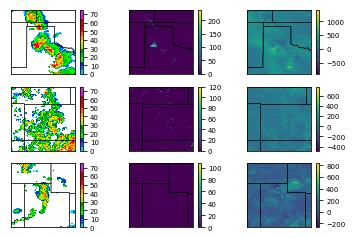

In [17]:
events = ['Mallard', 'Lake Christine', 'July Storm']

c = reflect_ncdc()

units = r'J km$\mathregular{^{-1}}$'

fig, axes = plt.subplots(3,3)
for ax, event in zip(axes, events):
    FIRE = get_fire(event)
    DATE = FIRE['event']
    LON = FIRE['longitude']
    LAT = FIRE['latitude']
    Hrefc = get_hrrr_variable(DATE, 'REFC:entire', verbose=False, value_only=True)
    MXUPHL = get_hrrr_variable(DATE-timedelta(hours=1), 'MXUPHL:5000-2000 m above ground', fxx=1, verbose=False, value_only=True)
    H3000 = get_hrrr_variable(DATE, 'HLCY:3000-0 m above ground', verbose=False, value_only=True)
    
    plt.sca(ax[0])
    m = draw_centermap((LAT,LON), size=(3.5, 3.5))
    m.drawstates()
    m.contourf(lon, lat, Hrefc['value'], latlon=True, levels=range(0,80,5),
               cmap=c['cmap'], vmax=c['vmax'], vmin=c['vmin'])
    plt.colorbar()
    
    plt.sca(ax[1])
    m = draw_centermap((LAT,LON), size=(3.5, 3.5))
    m.drawstates()
    m.pcolormesh(lon, lat, MXUPHL['value'], latlon=True)
    plt.colorbar()
    
    plt.sca(ax[2])
    m = draw_centermap((LAT,LON), size=(3.5, 3.5))
    m.drawstates()
    m.pcolormesh(lon, lat, H3000['value'], latlon=True)
    plt.colorbar()
    
    print('finished', event)


 >> Dowloading tempfile: ./temp_hrrr_2018071705_f01_MXU.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180717/hrrr.t05z.wrfsfcf01.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180717/hrrr.t05z.wrfsfcf01.grib2.idx
 >> Matched a variable:  43:26115528:d=2018071705:MXUPHL:5000-2000 m above ground:0-1 hour max fcst:
 >> Byte Range: 26115528 26136510
  Run Date: 2018-07-17 05:00 UTC F01
Valid Date: 2018-07-17 05:00 UTC


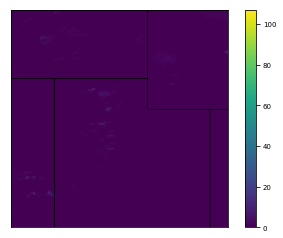

In [16]:
m.pcolormesh(lon, lat, get_hrrr_variable(DATE-timedelta(hours=1), 'MXUPHL:5000-2000 m above ground', fxx=1)['value'])
m.drawstates()
plt.colorbar()